# DAT-DEN-03 | Practice

## Affairs Data:

Extramarital affair data used to explain the allocation of an individual’s time among work, time spent with a spouse, and time spent with a paramour. The data is used as an example of regression with censored data.

Number of observations: 6366
Number of variables: 9
Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs

In [179]:
import statsmodels.api as sm
from sklearn import linear_model
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn import metrics
%pylab inline
import os
import sys
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


/Users/665066/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'f', 'types', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [180]:
# import affair.csv data as df
df = pd.read_csv(os.path.join('..', 'datasets', 'affair.csv'))

In [181]:
# show few rows
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32.0,9.0,3.0,3,17,2,5,0.111111
1,3,27.0,13.0,3.0,1,14,3,4,3.230769
2,4,22.0,2.5,0.0,1,16,3,5,1.400000
3,4,37.0,16.5,4.0,3,16,5,5,0.727273
4,5,27.0,9.0,1.0,1,14,3,4,4.666666


## Part A: data exploration

In [182]:
# describe
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [183]:
df['affair_bool'] = (df.affairs > 0).astype(int)

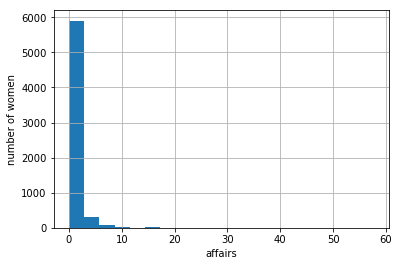

In [184]:
df['affairs'].hist(bins=20)
xlabel('affairs')
ylabel('number of women')

#### Exploring affairs vs marraige ratings : 

In [185]:
rating_vs_target = pd.crosstab(df['rate_marriage'], df['affair_bool'])
rating_vs_target

affair_bool,0,1
rate_marriage,,
1,25,74
2,127,221
3,446,547
4,1518,724
5,2197,487


In [186]:
total_ratings = rating_vs_target.apply(sum)
total_ratings

affair_bool
0    4313
1    2053
dtype: int64

In [187]:
rating_vs_target /= total_ratings
rating_vs_target

affair_bool,0,1
rate_marriage,,
1,0.005796,0.036045
2,0.029446,0.107647
3,0.103408,0.266439
4,0.351959,0.352655
5,0.509390,0.237214


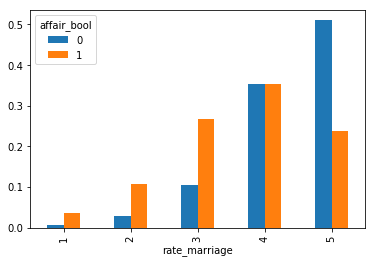

In [188]:
rating_vs_target.plot(kind='bar')

##### Conclusion: Women who rate their marriages higher have lesser number of affairs. Let use a model to verify our claim.

## Show me what you can get? Can you predict who might have an affair or not?